### Regeln
Die Simulation findet auf einem unendlichen 2D Raster statt. Jedes Feld ist eine Zelle, die entweder am leben oder tod sein kann.

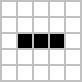

Eine Zelle hat 8 Nachbarzellen:

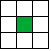

Jede Generation (Runde) ändert sich der Zustand der Felder auf der Basis von vier Regeln:

1. Eine tote Zelle mit mit genau drei lebenden Nachbarn wird in der nächsten Generation "geboren".
2. Eine lebende Zelle mit weniger als zwei lebenden Nachbarn "stirbt" in der nächsten Generation.
3. Eine lebende Zelle mit zwei oder drei lebenden Nachbarn bleibt am leben.
4. Eine lebende Zelle mit mehr als drei lebenden Nachbarn stirbt in der nächsten Generation.


### Beispiele
#### Absterben
###### 1. Generation 
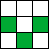
###### 2. Generation 
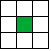
###### 3. Generation 
?
### Blinker
###### 1. Generation
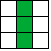
###### 2. Generation 
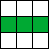
###### 3. Generation
?
###### 11. Generation
?
#### Gleiter

###### 1. Generation
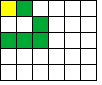
###### 2. Generation
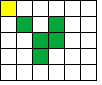
###### 3. Generation

######  4. Generation
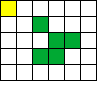


# Optimierung des Programms
Unser Programm ist aktuell eher ineffizient.

### Was ist Effizienz?
- Geschwindigkeit
- Speicherplatznutzen

Wenn zwei Programme das gleiche Ziel erreichen und das eine schneller ist oder weniger Speicherplatz braucht, ist dieses Programm effizienter.

### Speicherplatz
Um den Speicherplatznutzen zu reduzieren, können wir `numpy` benutzen.

`numpy` ist eine Bibliothek, die es dir erlaubt Listen (`Arrays`) zu erstellen. Diese Arrays sind begrenzter als `list` Typen, da einem Array keine neuen Elemente hinzugefügt werden können und alle Elemente eines Arrays den gleichen Datentyp haben müssen.

In [10]:
import numpy as np

x = np.array([ [1,2,3]
             , [4,5,6]
             ], dtype=np.int)

print(x.size)
print(x.shape)
print(x.dtype)

6
(2, 3)
int64


##### Was ist `size`?
##### Was ist `shape`?
##### Was ist `dtype`?


### Was kann `numpy`?

#### Rechnen mit Arrays
Mit `numpy` Arrays kannst du rechnen, als wären es Zahlen.

Alle Operationen werden auf den korrespondierenden Elementen der Arrays ausgeführt und ein neues Array aus den Ergebnissen erstellt.

In [3]:
y = np.array([ [1, 1, 2]
             , [2, 5, 1]
             ], dtype=np.int)

print("X: ")
print(x)
print("Y: ")
print(y)
print("X+Y = ")
print(x+y)
print("X*Y = ")
print(x*y)
print("X/Y = ")
print(x/y)

X: 
[[1 2 3]
 [4 5 6]]
Y: 
[[1 1 2]
 [2 5 1]]
X+Y = 
[[ 2  3  5]
 [ 6 10  7]]
X*Y = 
[[ 1  2  6]
 [ 8 25  6]]
X/Y = 
[[1.  2.  1.5]
 [2.  1.  6. ]]


#### Schnell neue Arrays erstellen
`numpy` hat mehrere Funktionen um schnell Arrays mit unterschiedlichen Größen (Dimensionen) zu erstellen.

- `np.zeros` erstellt ein Array mit Nullen (oder dem äquivalenten Werten für den Datentype)
- `np.ones` erstellt ein Array mit Einsen


In [6]:
a = np.zeros((10**6,3), dtype=np.int)
b = np.ones((10**6,3), dtype=np.int)

print(5*b)
print(b)


[[5 5 5]
 [5 5 5]
 [5 5 5]
 ...
 [5 5 5]
 [5 5 5]
 [5 5 5]]
[[1 1 1]
 [1 1 1]
 [1 1 1]
 ...
 [1 1 1]
 [1 1 1]
 [1 1 1]]


## Was kann `numpy` nicht?

- Arrays können nicht vergrößert werden. (Kein `append`)
- Arrays haben immer nur Werte eines Datentypes. (Kein `[True, 1, "Hello, World"]`)

### Parallelisierung

Bisher haben wir Programme geschrieben, die eine Reihe von Befehlen nacheinander ausführen.

Aber natürlich kann ein Programm auch mehrere Dinge nebeneinander ausführen. Diese Technik nennt sich "Parallelisierung".

Indem wir mehrere Rechnungen gleichzeitig ausführen, können wir ein Programm beschleunigen.

#### Wie können wir es nutzen?
Bei Conway's Game of Life, ist der Zustand jeder Zelle immer nur von der vorherigen Runde abhängig.

Daher können wir den Zustand der einzelnen Zellen in einer Generation parallel zueinander. Aber wir können nicht gleichzeitig mehrere Generationen berechnen. Eine Generation hängt immer von ihrem Vorgänger ab.

##### `multiprocessing`
- Bibliothek zum parallelen Ausführen von Funktionen
- Enhält `Pool`, eine Funktion mit der du mehrere eine Funktion parallel mit unterschiedlichen Argumenten ausführen kann.

In [7]:
from multiprocessing import Pool

def f(x):
    return x*x

with Pool(5) as p:
    print(p.map(f, [5, 3, 2]))


[25, 9, 4]


`p.map` nimmt eine Funktion (`f`) und eine liste von Argumenten. Wenn die Funktion mehrere Argumente nimmt, kannst du einen Tuple übergeben.

In [ ]:
def g(args):
    return args[0]+args[1]

with Pool(5) as p:
    print(p.map(g, [(4,3),(2,1)]))


### Optimiere